1.importing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

2.Data load

In [ ]:
df=pd.read_csv("Dentistry Dataset.csv")

In [ ]:
print(df.head())

   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.9

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

3.Data pre-processing

In [ ]:
# data pre-processing
num_cols =df.select_dtypes (include=['number']).columns

df [num_cols] = df[num_cols].fillna (df[num_cols].mean())

cat_cols =df.select_dtypes (include=['object']).columns

for col in cat_cols:df[col] = df[col].fillna(df[col].mode()[0])
print(df.isnull().sum())

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64


In [ ]:
#independent variable
X = df.drop(columns=['Gender'])
#dependent variable
y= df['Gender']


4.TRANING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



df=pd.read_csv("Dentistry Dataset.csv")

df['Gender'] = df ['Gender'].map({'Male': 0, 'Female': 1})

X = df.drop(columns=['Gender'])
y= df['Gender']



scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)



X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


print("Train Data Shape:", X_train.shape, y_train.shape)
print("Test Data Shape:",X_test.shape, y_test.shape)



Train Data Shape: (880, 13) (880,)
Test Data Shape: (220, 13) (220,)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


5.EDA

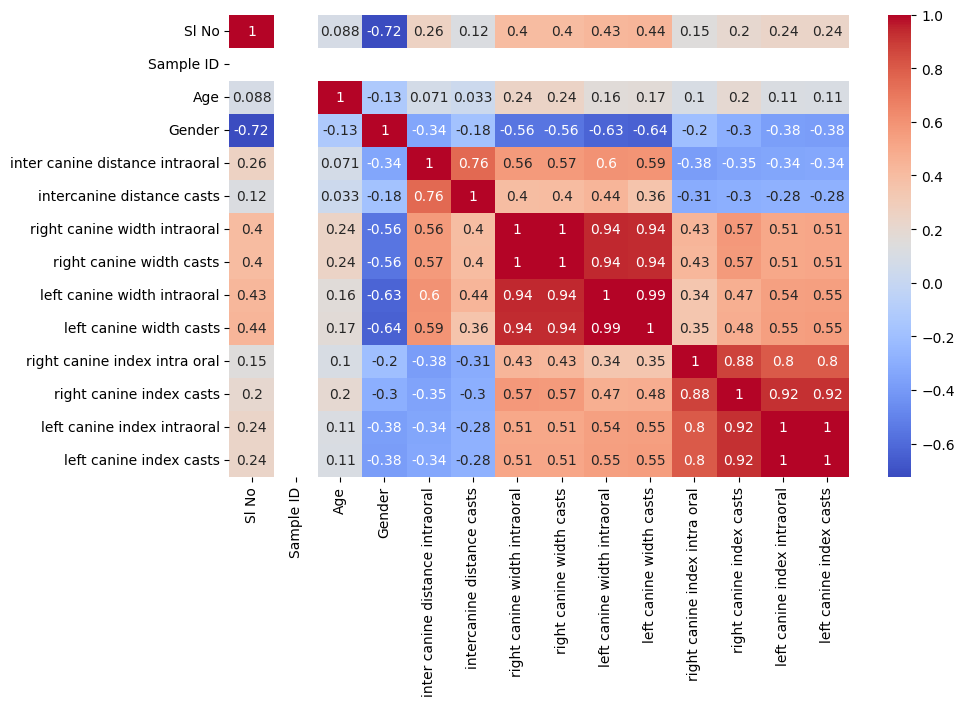

In [ ]:
plt.figure(figsize=(10, 6))

sns.heatmap(df.corr(), annot=True,

cmap="coolwarm")

plt.show()

6.MACHINELEARNING MODEL PREADICTION

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#Train a Random Forest Model

model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train, y_train)

#Predictions

y_pred= model.predict(X_test)

#Model Evaluation

accuracy= accuracy_score(y_test, y_pred)

conf_matrix=confusion_matrix(y_test, y_pred)

class_report =classification_report(y_test, y_pred)

print("Accuracy:", accuracy)

print("Confusion Matrix:\n",conf_matrix)

print("Classification Report:\n",class_report)

Accuracy: 0.9681818181818181
Confusion Matrix:
 [[101   6]
 [  1 112]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       107
           1       0.95      0.99      0.97       113

    accuracy                           0.97       220
   macro avg       0.97      0.97      0.97       220
weighted avg       0.97      0.97      0.97       220



7.Model Evaluation code

Accuracy: 0.9681818181818181
Confusion Matrix:
 [[101   6]
 [  1 112]]


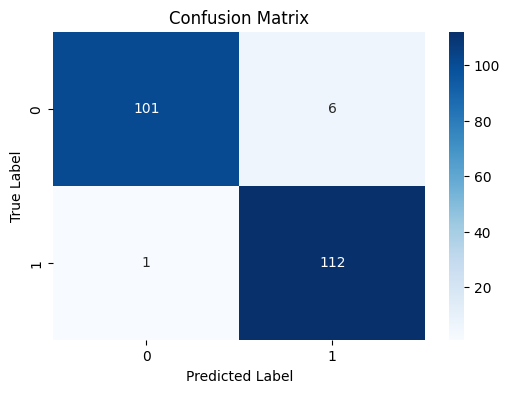

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       107
           1       0.95      0.99      0.97       113

    accuracy                           0.97       220
   macro avg       0.97      0.97      0.97       220
weighted avg       0.97      0.97      0.97       220



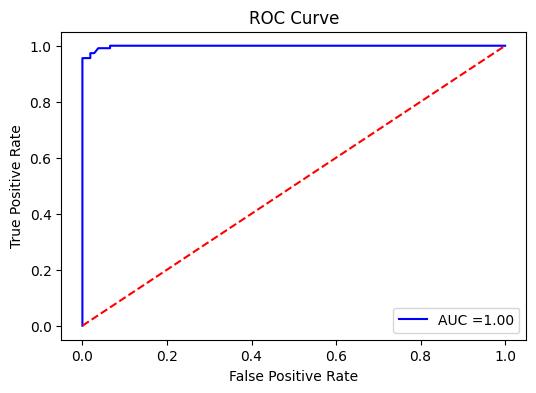

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

# Predictions

y_pred =model.predict(X_test)

# Accuracy

accuracy= accuracy_score(y_test,y_pred)

print("Accuracy:", accuracy)

# Confusion Matrix

conf_matrix =confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n",conf_matrix)

# Plot Confusion Matrix

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot =True,
fmt="d", cmap="Blues")

plt.xlabel("Predicted Label")

plt.ylabel("True Label")

plt.title("Confusion Matrix")

plt.show()

# Classification Report

class_report =classification_report(y_test, y_pred)

print("Classification Report:\n",class_report)

# ROC Curve and AUC

y_pred_prob =model.predict_proba(X_test) [:, 1]
fpr, tpr,_ = roc_curve(y_test,y_pred_prob)
roc_auc= auc(fpr, tpr)
#Plot ROC Curve

plt.figure(figsize=(6, 4))

plt.plot(fpr, tpr, label=f"AUC ={roc_auc:.2f}", color="blue")

plt.plot([0, 1], [0, 1],

linestyle="--", color="red") #

#Random classifier

plt.xlabel("False Positive Rate")

plt.ylabel("True Positive Rate")

plt.title("ROC Curve")

plt.legend()

plt.show()